# 📈 Final Model Comparison Summary

This notebook compares and summarizes the performance of various time series models used to forecast AAPL stock prices.

### Models included:
- ARIMA
- SARIMA
- Prophet
- LSTM
- Random Forest
- XGBoost
- Exponential smoothening-(ETS)

Performance is evaluated using RMSE (Root Mean Squared Error).

## 📊 RMSE Comparison Table

In [2]:
import pandas as pd

# RMSE data from all models including ETS
rmse_data = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM', 'Random Forest', 'XGBoost', 'ETS'],
    'RMSE': [1.06, 30.20, 16.02, 6.59, 9.33, 5.95, 4.428],
    'Notes': [
        'Based on differenced data (price change)',
        'Added seasonality with SARIMA model',
        'Forecasted actual closing price',
        'Predicted actual price using past 60 days',
        'Tree-based model using lag features',
        'Boosted tree model using lag features',
        'Exponential Smoothing (trend only)'
    ]
}

rmse_df = pd.DataFrame(rmse_data)
rmse_df.sort_values(by='RMSE', inplace=True)
rmse_df.reset_index(drop=True, inplace=True)
rmse_df

,Model,RMSE,Notes
0,ARIMA,1.060,Based on differenced data (price change)
1,ETS,4.428,Exponential Smoothing (trend only)
2,XGBoost,5.950,Boosted tree model using lag features
3,LSTM,6.590,Predicted actual price using past 60 days
4,Random Forest,9.330,Tree-based model using lag features
5,Prophet,16.020,Forecasted actual closing price
6,SARIMA,30.200,Added seasonality with SARIMA model


## 📉 Visual Comparison of RMSE

C:\Users\austi\AppData\Local\Temp\ipykernel_22924\771871923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_df, x='Model', y='RMSE', palette='viridis')


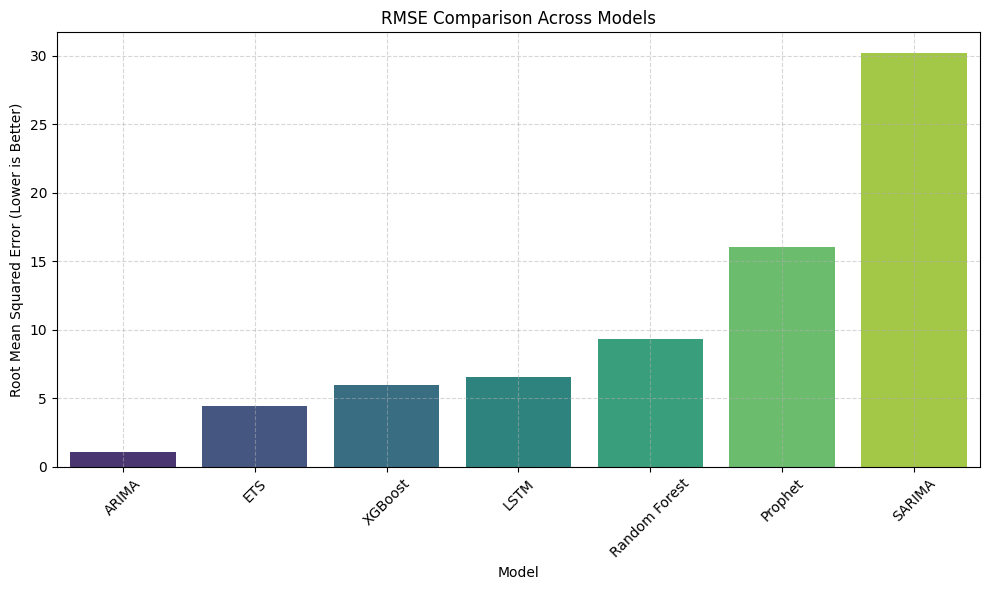

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x='Model', y='RMSE', palette='viridis')
plt.title("RMSE Comparison Across Models")
plt.ylabel("Root Mean Squared Error (Lower is Better)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🧠 Observations

- **ARIMA** had the lowest RMSE, but it only predicted the *change* in price, not the actual price.
- **XGBoost** and **LSTM** gave strong performance on actual price prediction.
- **Random Forest** did decently well with lag features but was slightly worse than XGBoost.
- **Prophet** was easy to implement but gave higher RMSE.
- **SARIMA** performed poorly, likely due to overfitting or seasonal misconfiguration.

- **ETS** gave strong performance (RMSE ~4.43), better than LSTM and Random Forest, with a simple trend-based model.

## ✅ Recommendation

- For **accuracy on actual prices**, use **XGBoost** or **LSTM**.
- For **simple and interpretable trend forecasts**, use **Prophet**.
- Use **ARIMA** if you're interested in predicting price change rather than actual values.
- Avoid SARIMA unless you tune seasonality better or use longer time periods.

You can also try **hybrid models** or **ensembles** (e.g., stacking LSTM with XGBoost) to improve performance further.

- **Use ETS** if you want good accuracy with a simple trend-only model and fast training.